In [2]:
from gameEnv import gameEnv
from Q_learn import Q_learn_agent
from MCTS import MCTS_agent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

Performance of MCTS over different values of the parameter C

In [41]:
C_arr = list(np.logspace(-2, 3, num=30))
wins_arr_c = []
moves_arr_c = []
loss_arr_c = []
stalemates_arr_c = []

game = gameEnv(height=6,width=5,win_streak=4)

for c in C_arr:

    player1 = MCTS_agent(1, playouts=200, C=c)
    player2 = MCTS_agent(2, playouts=40, C=c)
    wins = 0
    moves = 0
    losses = 0
    stalemates = 0

    for e in range(100):

        if (e == 50):
            player1 = MCTS_agent(1,playouts=40,C=c)
            player2 = MCTS_agent(2,playouts=200,C=c)

        turn = 1
        game_status = 0

        while(game_status==0):
            if (turn==1):
                action = player1.get_next_action(game)
                game_status = game.make_move(action, player=1)
                turn = 2
            else:
                action = player2.get_next_action(game)
                game_status = game.make_move(action, player=2)
                turn = 1
            player1.update_agent_state(action)
            player2.update_agent_state(action)
            moves+=1
        
        if (game_status==1):
            if (e<50 and turn == 2) or (e>=50 and turn == 1):
                wins+=1
            else:
                losses+=1
        else:
            stalemates+=1
        
        game.reset_game()
        player1.reset_agent()
        player2.reset_agent()
        
    wins_arr_c.append(wins)
    loss_arr_c.append(losses)
    stalemates_arr_c.append(stalemates)
    moves_arr_c.append(moves/100.0)

Text(0, 0.5, 'Average Total moves in the game')

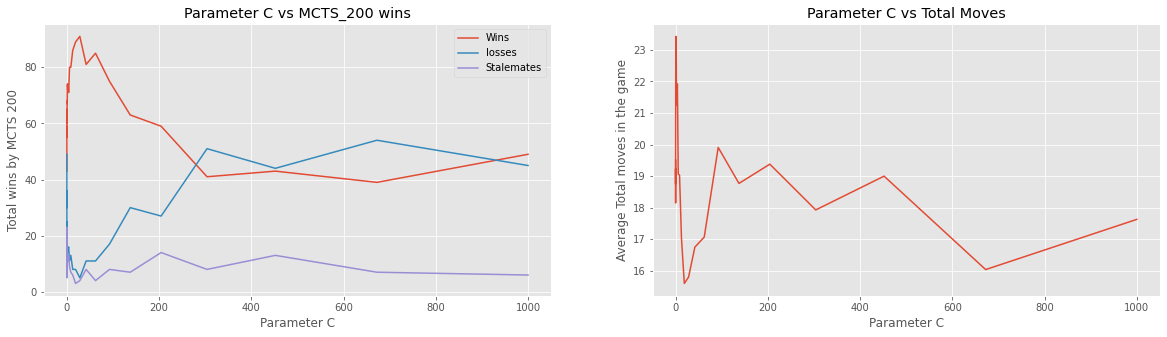

In [42]:
style.use('ggplot')
fig, axs = plt.subplots(1,2,figsize = (20,5))
axs[0].plot(C_arr, wins_arr_c, label = 'Wins')
axs[0].plot(C_arr, loss_arr_c, label = 'losses')
axs[0].plot(C_arr, stalemates_arr_c, label = 'Stalemates')
axs[0].legend()
axs[0].set_title("Parameter C vs MCTS_200 wins")
axs[0].set_xlabel("Parameter C")
axs[0].set_ylabel("Total wins by MCTS 200")

axs[1].plot(C_arr, moves_arr_c)
axs[1].set_title("Parameter C vs Total Moves")
axs[1].set_xlabel("Parameter C")
axs[1].set_ylabel("Average Total moves in the game")

In [68]:
C_arr_2 = list(np.logspace(-2, 3, num=30))
wins_arr_c_2 = []
moves_arr_c_2 = []
loss_arr_c_2 = []
stalemates_arr_c_2 = []

game = gameEnv(height=6,width=5,win_streak=4)

for c in C_arr_2:

    player1 = MCTS_agent(1, playouts=200, C=c)
    player2 = MCTS_agent(2, playouts=200, C=2)
    wins = 0
    moves = 0
    losses = 0
    stalemates = 0

    for e in range(100):

        if (e == 50):
            player1 = MCTS_agent(1,playouts=200,C=2)
            player2 = MCTS_agent(2,playouts=200,C=c)

        turn = 1
        game_status = 0

        while(game_status==0):
            if (turn==1):
                action = player1.get_next_action(game)
                game_status = game.make_move(action, player=1)
                turn = 2
            else:
                action = player2.get_next_action(game)
                game_status = game.make_move(action, player=2)
                turn = 1
            player1.update_agent_state(action)
            player2.update_agent_state(action)
            moves+=1
        
        if (game_status==1):
            if (e<50 and turn == 2) or (e>=50 and turn == 1):
                wins+=1
            else:
                losses+=1
        else:
            stalemates+=1
        
        game.reset_game()
        player1.reset_agent()
        player2.reset_agent()
        
    wins_arr_c_2.append(wins)
    loss_arr_c_2.append(losses)
    stalemates_arr_c_2.append(stalemates)
    moves_arr_c_2.append(moves/100.0)

Text(0, 0.5, 'Average Total moves in the game')

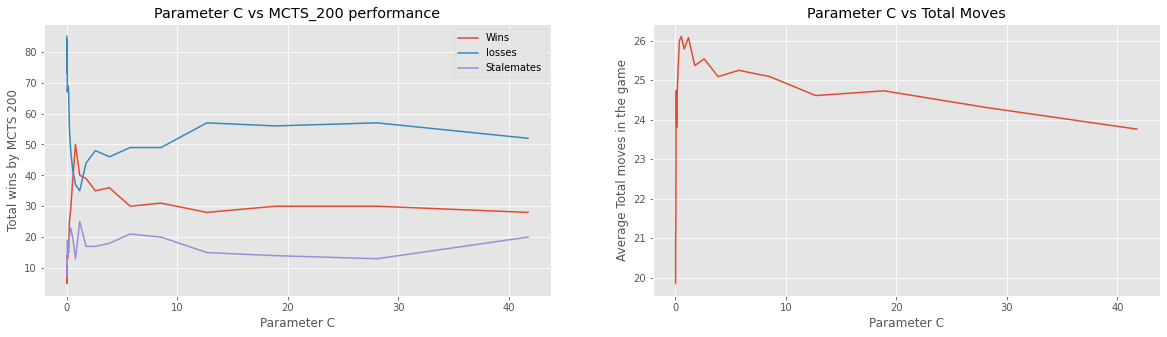

In [100]:
style.use('ggplot')
fig, axs = plt.subplots(1,2,figsize = (20,5))
axs[0].plot(C_arr_2[:-8], wins_arr_c_2[:-8], label = 'Wins')
axs[0].plot(C_arr_2[:-8], loss_arr_c_2[:-8], label = 'losses')
axs[0].plot(C_arr_2[:-8], stalemates_arr_c_2[:-8], label = 'Stalemates')
axs[0].legend()
axs[0].set_title("Parameter C vs MCTS_200 performance")
axs[0].set_xlabel("Parameter C")
axs[0].set_ylabel("Total wins by MCTS 200")

axs[1].plot(C_arr_2[:-8], moves_arr_c_2[:-8])
axs[1].set_title("Parameter C vs Total Moves")
axs[1].set_xlabel("Parameter C")
axs[1].set_ylabel("Average Total moves in the game")

### Evaluation of Q-Learning over different hyperparameters

In [5]:
#General Parameters used for Q_learning training

train_epochs = 200
batch_epochs = 10
board_rows = 4
board_cols = 5

In [76]:
def test_Q_learn_vs_MCTS_n(Q_agent):

    n_min_test = 0
    n_max_test = 25
    wins=0
    losses=0
    stalemates=0
    test_epochs = 100
    batch_epochs = 10

    game = gameEnv(height=board_rows, width=board_cols, win_streak=4)
    
    for t in range(test_epochs):
        n = np.random.randint(n_min_test, n_max_test+1)
        MCTS_player = MCTS_agent(playouts=n, player=1,C=1)
        w,l,s = Q_agent.test(epoch=batch_epochs, agent=MCTS_player, game = game)
        wins+=w
        losses+=l
        stalemates+=s 
    
    return wins/10, losses/10, stalemates/10



Evaluation of performance over different values of alpha

In [77]:
alpha_arr = list(np.logspace(-3, 0, num=15))
wins_arr_a = []
loss_arr_a = []
stalemates_arr_a = []

n_min_train = 0
n_max_train = 25

for alpha in alpha_arr:

    Q_agent = Q_learn_agent(player=2, initial_Q_value=0)
    game = gameEnv(height=board_rows, width=board_cols, win_streak=4)
    wins = 0
    losses = 0
    stalemates=0

    for e in range(train_epochs):
        n = np.random.randint(n_min_train, n_max_train+1)
        MCTS_player = MCTS_agent(playouts=n, player=1, C=1)
        Q_agent.train(epoch=batch_epochs, agent= MCTS_player, game = game, alpha=alpha, gamma=0.4, greedy_prob=0.05)
        
    wins,losses,stalemates = test_Q_learn_vs_MCTS_n(Q_agent=Q_agent)    
    
    wins_arr_a.append(wins)
    loss_arr_a.append(losses)
    stalemates_arr_a.append(stalemates)

Text(0.5, 0, 'Alpha')

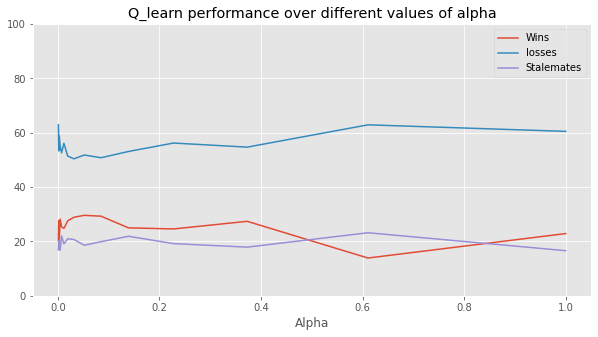

In [78]:
style.use('ggplot')
plt.figure(figsize = (10,5))
plt.plot(alpha_arr, wins_arr_a, label = 'Wins')
plt.plot(alpha_arr, loss_arr_a, label = 'losses')
plt.plot(alpha_arr, stalemates_arr_a, label = 'Stalemates')
plt.legend()
plt.title("Q_learn performance over different values of alpha")
plt.ylim(0,100)
plt.xlabel("Alpha")

Evaluation of performance over different values of gamma

In [79]:
gamma_arr = list(np.logspace(-2, 0, num=15))
wins_arr_g = []
loss_arr_g = []
stalemates_arr_g = []

n_min_train = 0
n_max_train = 25

for gamma in gamma_arr:

    Q_agent = Q_learn_agent(player=2, initial_Q_value=0)
    game = gameEnv(height=board_rows, width=board_cols, win_streak=4)
    wins = 0
    losses = 0
    stalemates=0

    for e in range(train_epochs):
        n = np.random.randint(n_min_train, n_max_train+1)
        MCTS_player = MCTS_agent(playouts=n, player=1, C=1)
        Q_agent.train(epoch=batch_epochs, agent= MCTS_player, game = game, alpha=0.1, gamma=gamma, greedy_prob=0.05)
        
    wins,losses,stalemates = test_Q_learn_vs_MCTS_n(Q_agent=Q_agent)    
    
    wins_arr_g.append(wins)
    loss_arr_g.append(losses)
    stalemates_arr_g.append(stalemates)

(0.0, 100.0)

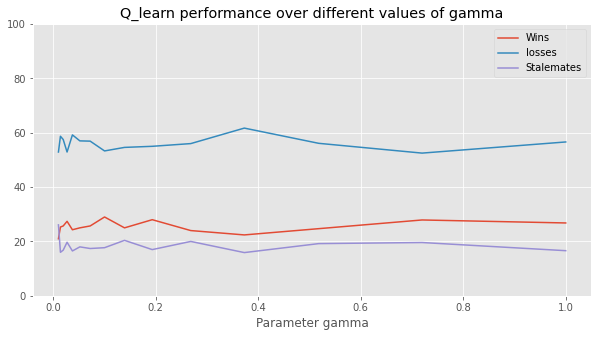

In [80]:
style.use('ggplot')
plt.figure(figsize = (10,5))
plt.plot(gamma_arr, wins_arr_g, label = 'Wins')
plt.plot(gamma_arr, loss_arr_g, label = 'losses')
plt.plot(gamma_arr, stalemates_arr_g, label = 'Stalemates')
plt.legend()
plt.title("Q_learn performance over different values of gamma")
plt.xlabel("Parameter gamma")
plt.ylim(0,100)

### Training Q_learn Algorithm against MC_n agent where n lies between (0,25)

In [81]:
#General Parameters used for Q_learning training

train_epochs = 1000
batch_epochs = 10
board_rows = 4
board_cols = 5

Technique 1: Train the Q_learn algorithm against MC_n agents where n varies 0 to 25

In [82]:
wins_arr_1 = []
loss_arr_1 = []
stalemates_arr_1 = []
epoch_arr_1 = []

n_min_train = 0
n_max_train = 25

Q_agent = Q_learn_agent(player=2, initial_Q_value=0)
game = gameEnv(height=board_rows, width=board_cols, win_streak=4)

for e in range(train_epochs):
    n = np.random.randint(n_min_train, n_max_train+1)
    MCTS_player = MCTS_agent(playouts=n, player=1, C=1)
    Q_agent.train(epoch=batch_epochs, agent= MCTS_player, game = game, alpha=0.1, gamma=0.4, greedy_prob=0.05) 

    if((e+1)%10==0):
        wins,losses,stalemates = test_Q_learn_vs_MCTS_n(Q_agent)
        wins_arr_1.append(wins)
        loss_arr_1.append(losses)
        stalemates_arr_1.append(stalemates)
        epoch_arr_1.append(e+1)

Technique 2: Train the Q_learn algorithm against MC_n agents where n varies 25 to 40

In [83]:
wins_arr_2 = []
loss_arr_2 = []
stalemates_arr_2 = []
epoch_arr_2 = []

n_min_train = 25
n_max_train = 40

Q_agent = Q_learn_agent(player=2, initial_Q_value=0)
game = gameEnv(height=board_rows, width=board_cols, win_streak=4)

for e in range(train_epochs):
    n = np.random.randint(n_min_train, n_max_train+1)
    MCTS_player = MCTS_agent(playouts=n, player=1, C=1)
    Q_agent.train(epoch=batch_epochs, agent= MCTS_player, game = game, alpha=0.1, gamma=0.4, greedy_prob=0.05) 

    if((e+1)%10==0):
        wins,losses,stalemates = test_Q_learn_vs_MCTS_n(Q_agent)
        wins_arr_2.append(wins)
        loss_arr_2.append(losses)
        stalemates_arr_2.append(stalemates)
        epoch_arr_2.append(e+1)

Technique 3: Train the Q_learn algorithm against MC_n agents where n is fixed to 25

In [84]:
wins_arr_3 = []
loss_arr_3 = []
stalemates_arr_3 = []
epoch_arr_3 = []

n_min_train = 25
n_max_train = 25

Q_agent = Q_learn_agent(player=2, initial_Q_value=0)
game = gameEnv(height=board_rows, width=board_cols, win_streak=4)

for e in range(train_epochs):
    n = np.random.randint(n_min_train, n_max_train+1)
    MCTS_player = MCTS_agent(playouts=n, player=1,C=1)
    Q_agent.train(epoch=batch_epochs, agent= MCTS_player, game = game, alpha=0.1, gamma=0.4, greedy_prob=0.05) 

    if((e+1)%10==0):
        wins,losses,stalemates = test_Q_learn_vs_MCTS_n(Q_agent)
        wins_arr_3.append(wins)
        loss_arr_3.append(losses)
        stalemates_arr_3.append(stalemates)
        epoch_arr_3.append(e+1)

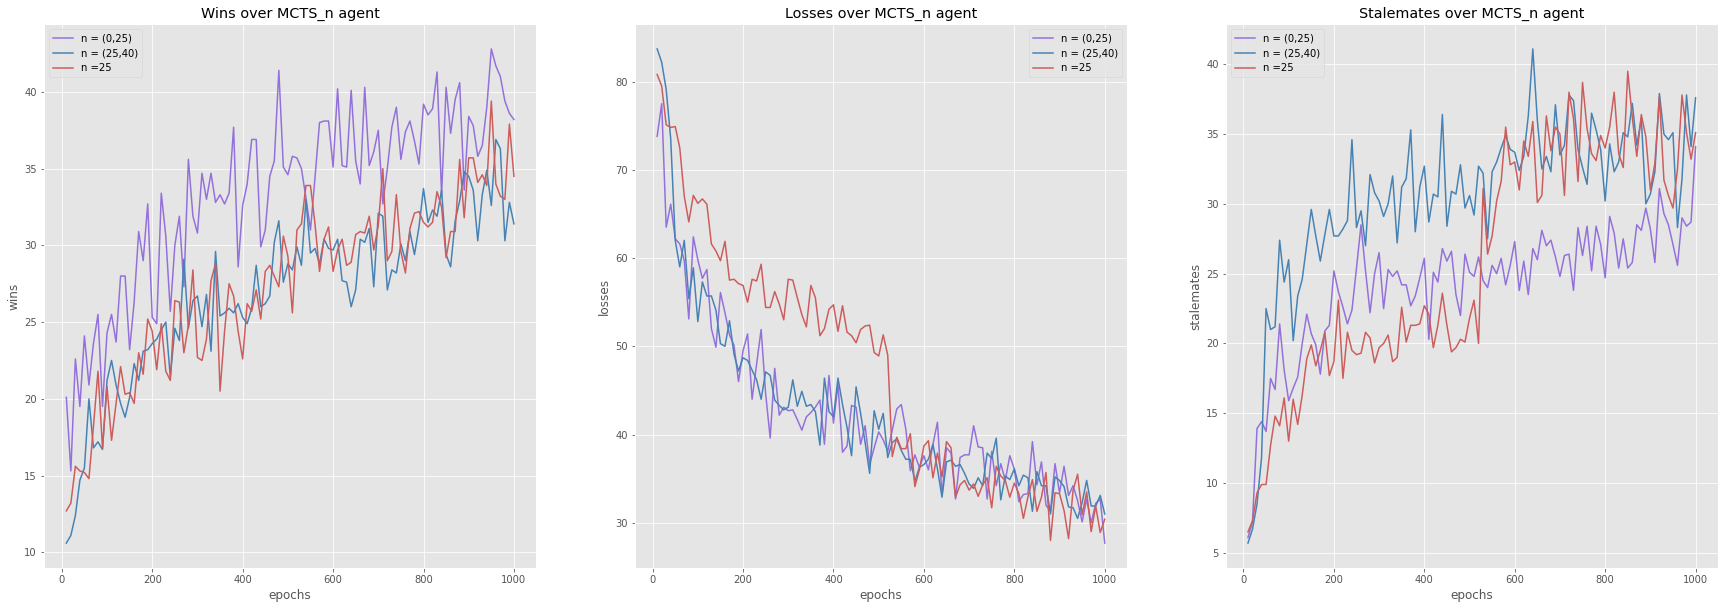

In [99]:
style.use('ggplot')
fig,axs = plt.subplots(1,3, figsize = (30,10))

axs[0].set_title("Wins over MCTS_n agent")
axs[0].plot(epoch_arr_1,wins_arr_1, label = "n = (0,25)", color = 'mediumpurple')
axs[0].plot(epoch_arr_2,wins_arr_2, label = "n = (25,40)", color = 'steelblue')
axs[0].plot(epoch_arr_3,wins_arr_3, label = "n =25", color = 'indianred')
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("wins")
#axs[0].set_ylim(0,100)
axs[0].legend()

axs[1].set_title("Losses over MCTS_n agent")
axs[1].plot(epoch_arr_1,loss_arr_1, label = "n = (0,25)", color = 'mediumpurple')
axs[1].plot(epoch_arr_2,loss_arr_2, label = "n = (25,40)", color = 'steelblue')
axs[1].plot(epoch_arr_3,loss_arr_3, label = "n =25", color = 'indianred')
axs[1].set_xlabel("epochs")
axs[1].set_ylabel("losses")
#axs[1].set_ylim(0,100)
axs[1].legend()

axs[2].set_title("Stalemates over MCTS_n agent")
axs[2].plot(epoch_arr_1,stalemates_arr_1, label = "n = (0,25)", color = 'mediumpurple')
axs[2].plot(epoch_arr_2,stalemates_arr_2, label = "n = (25,40)", color = 'steelblue')
axs[2].plot(epoch_arr_3,stalemates_arr_3, label = "n =25", color = 'indianred')
axs[2].set_xlabel("epochs")
axs[2].set_ylabel("stalemates")
#axs[2].set_ylim(0,100)
axs[2].legend()